In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
T = np.linspace(0, 1, 100)

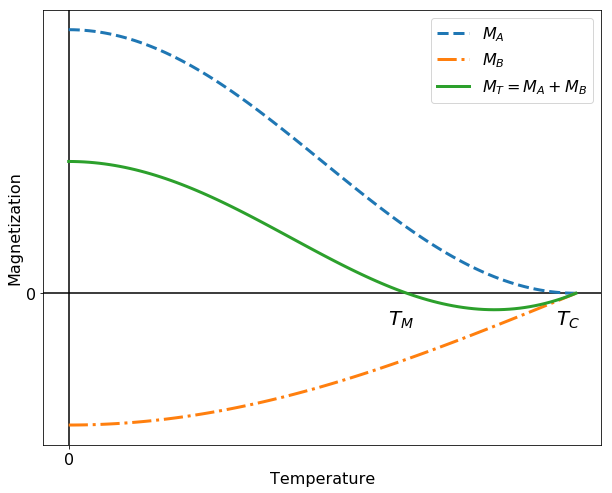

In [33]:
M_A = 0.5 * (np.cos(np.pi * T) + 1)
M_B = - 0.5 * np.cos(np.pi / 2 * T)
plt.figure(figsize=(10, 8))
plt.plot(T, M_A, '--', linewidth = 3)
plt.plot(T, M_B, '-.', linewidth = 3)
plt.plot(T, M_A + M_B, '-', linewidth = 3)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.xticks(np.array([0]), ('0'))
plt.yticks(np.array([0]), ('0'))
plt.grid(True, color = 'k', linewidth = 1.5)
plt.text(0.63, -0.12, r'$T_M$', fontsize = 20)
plt.text(0.96, -0.12, r'$T_C$', fontsize = 20)
plt.legend(['$M_A$', '$M_B$', '$M_T = M_A + M_B$'])
plt.rcParams.update({'font.size': 20})
#plt.savefig("ferrimagnetism.eps", dpi = 300, format = 'eps')
plt.show()

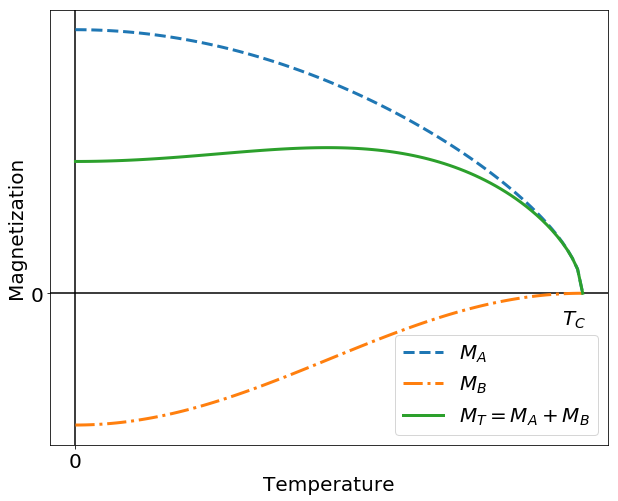

In [34]:
M_A = 0.6 * np.sqrt(1 - T ** 2) + 0.4 * np.cos(np.pi / 2 *T)
M_B = - 0.25 * (np.cos(np.pi * T) + 1)
plt.figure(figsize=(10, 8))
plt.plot(T, M_A, '--', linewidth = 3)
plt.plot(T, M_B, '-.', linewidth = 3)
plt.plot(T, M_A + M_B, '-', linewidth = 3)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.xticks(np.array([0]), ('0'))
plt.yticks(np.array([0]), ('0'))
plt.grid(True, color = 'k', linewidth = 1.5)
#plt.text(0.63, -0.12, r'$T_M$', fontsize = 20)
plt.text(0.96, -0.12, r'$T_C$', fontsize = 20)
plt.legend(['$M_A$', '$M_B$', '$M_T = M_A + M_B$'])
plt.rcParams.update({'font.size': 20})
plt.savefig("ferrimagnetism.eps", dpi = 300, format = 'eps')
plt.show()

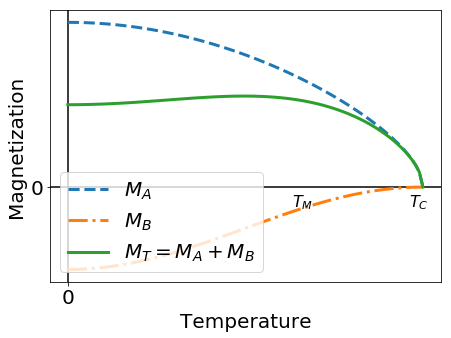

In [35]:
plt.figure(figsize=(7, 5))
plt.plot(T, M_A, '--', linewidth = 3)
plt.plot(T, M_B, '-.', linewidth = 3)
plt.plot(T, M_A + M_B, '-', linewidth = 3)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.xticks(np.array([0]), ('0'))
plt.yticks(np.array([0]), ('0'))
plt.grid(True, color = 'k', linewidth = 1.5)
plt.text(0.63, -0.12, r'$T_M$', fontsize = 16)
plt.text(0.96, -0.12, r'$T_C$', fontsize = 16)
plt.legend(['$M_A$', '$M_B$', '$M_T = M_A + M_B$'])
plt.rcParams.update({'font.size': 16})
plt.savefig("ferrimagnetism.eps", dpi = 300, format = 'eps')
plt.show()

In [36]:
def circular_polarized(z, sigma, wavelength):
    '''
    '''
    theta = 2 * np.pi / wavelength * z * sigma
    (x, y) = (np.cos(theta), np.sin(theta))
    return (x, y)

def gaussian_shape(z, z0, width):
    '''
    '''
    sigma = width / (2 * np.sqrt(2 * np.log(2)))
    f = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(((z - z0) / sigma)**2 * -0.5)
    return f

def circular_polarized_pulse(z, sigma, wavelength, z0, width, x0, y0):
    '''
    '''
    (dx, dy) = circular_polarized(z, sigma, wavelength)
    f = gaussian_shape(z, z0, width)
    (x, y) = (x0 + f * dx, y0 + f * dy)
    return (x, y)

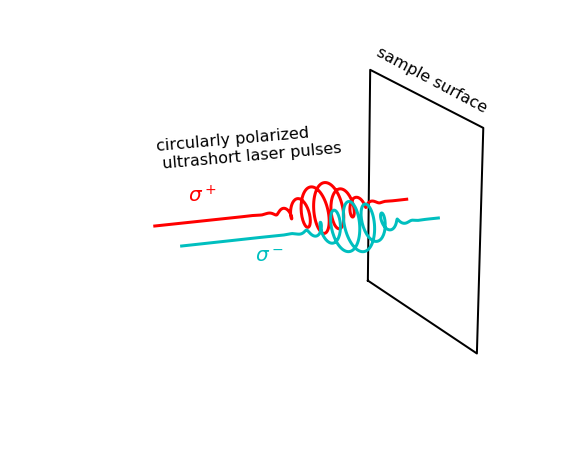

In [199]:
z = np.linspace(0, 30, 1000)
(x1, y1) = circular_polarized_pulse(z, +1, 1.8, 10, 6, -0.2, 0)
(x2, y2) = circular_polarized_pulse(z, -1, 1.8, 10, 6, +0.2, 0)
(ssx, ssy, ssz) = (np.array([0, 0, 0, 0, 0]), np.array([-0.7, 0.7, 0.7, -0.7, -0.7]), np.array([-0.7, -0.7, 0.7, 0.7, -0.7]))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot(ssx, ssy, ssz, color = 'k', linewidth = 2)
ax.plot(z, x1, y1, color = 'r', linewidth = 3)
ax.plot(z, x2, y2, color = 'c', linewidth = 3)
ax.text(30, 0.3, 0.3, '$\sigma^+$', color = 'r', fontsize = 20)
ax.text(25, 0.6, 0, '$\sigma^-$', color = 'c', fontsize = 20)
ax.text(0, -0.65, 0.8, 'sample surface', zdir = (-1.6, 1, 0), color = 'k', fontsize = 16)
ax.text(26, -0.7, 0.3, 'circularly polarized\n ultrashort laser pulses', zdir = (1, -0.005, 0), color = 'k', fontsize = 16)
ax.view_init(elev=20, azim=68)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.axis('off')
#plt.savefig("double-pulses-setup.eps", dpi = 300, format = 'eps')
plt.show()